# Task # 5 - To explore Business Analytics

## Data Visualization

Data visualization is the graphic representation of data. It involves producing images that communicate relationships among the represented data to viewers of the images. This communication is achieved through the use of a systematic mapping between graphic marks and data values in the creation of the visualization. 

## Problem Statement

Perform ‘Exploratory Data Analysis’ on the provided dataset
‘SampleSuperstore’

## Import necessary libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.graph_objs import *
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot

init_notebook_mode(connected=True)



## Import the dataset

EDA: The dataset contains 9994 rows and 13 columns.This dataset gives the information about the store company which gives the information about different categories such as Furniture,Office supplies and Technologies etc which have been purchased by United states and even the number of sales for a particular category and quantity has been given.

In [2]:
store_df = pd.read_csv("SampleSuperstore.csv")

In [7]:
# Viewed top 10 rows of the dataframe using head() method
store_df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


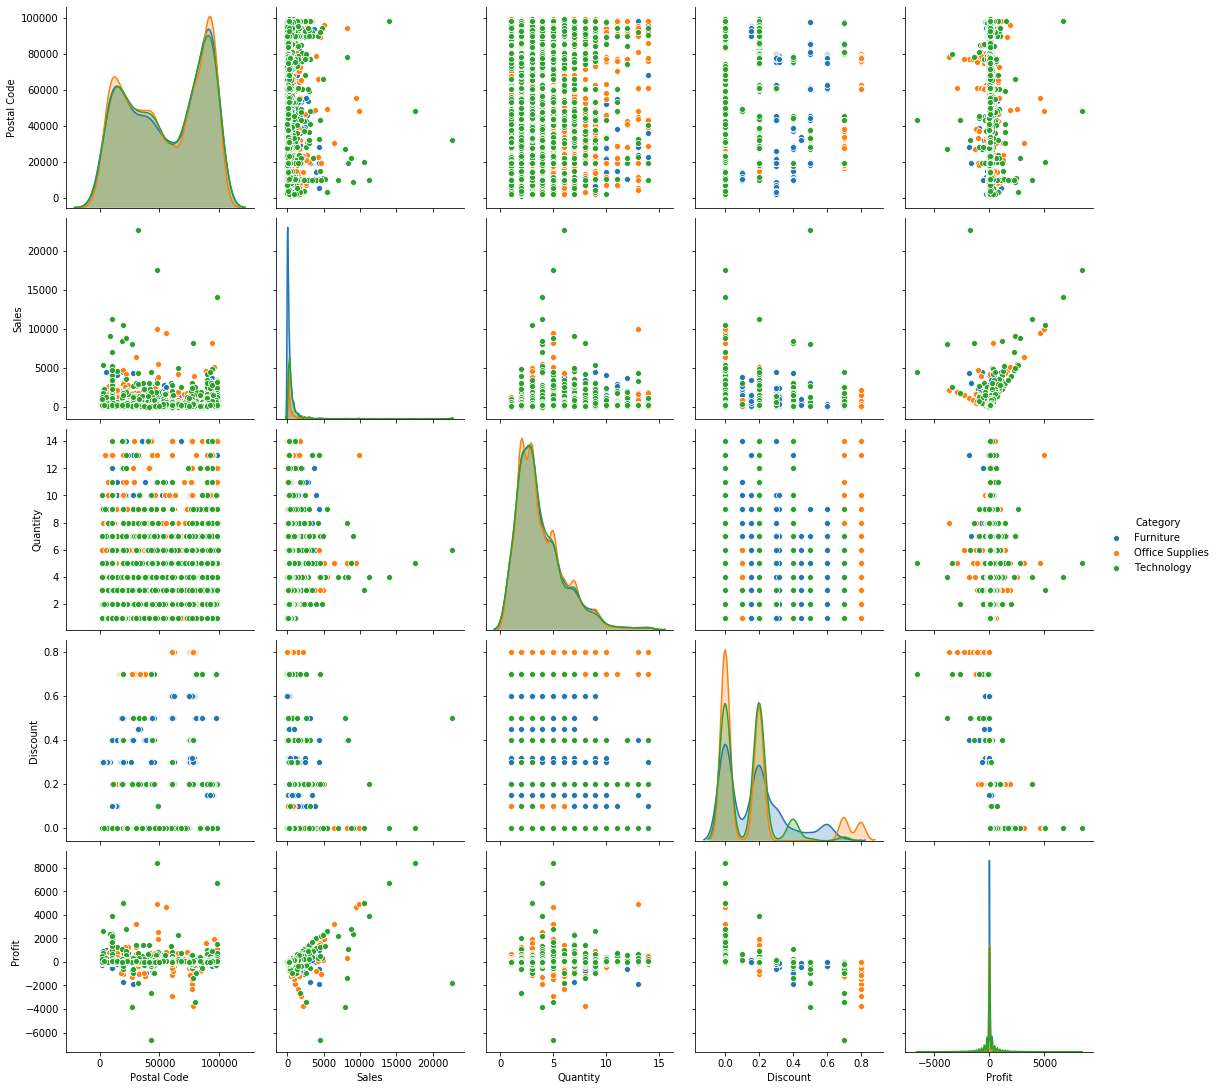

In [10]:
sns.pairplot(store_df,hue="Category", height=3, diag_kind="kde")

From the above graph we can visualize the distrubution of Furniture,Office supplies and technology based on Postalcode,sales,quantity,discount and profit

In [11]:
# Summary of the dataframe using info() method
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [12]:
# summary statistics of the dataframe using describe() method
store_df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [13]:
# Dimensions of the dataframe using shape attribute
store_df.shape

(9994, 13)

In [64]:
#Cities having maximum  Discounts
grouped= store_df.groupby("City")
avg_dist=grouped['Discount'].agg(np.mean).sort_values(ascending=False).reset_index()
max_dist=avg_dist[avg_dist['Discount'] >=0.5]

#Cities having minimum Sales
avg_sales=grouped['Sales'].agg(np.mean).sort_values(ascending=False).reset_index()
min_sales=avg_sales[avg_sales['Sales']<40]

#Merge both the data
merged= pd.merge(max_dist,min_sales, on=['City'],how='inner')
merged

,City,Discount,Sales
0,Deer Park,0.800000,6.924000
1,Abilene,0.800000,1.392000
2,Missouri City,0.800000,6.370000
3,Romeoville,0.800000,8.952000
4,Pensacola,0.700000,2.214000
5,Elyria,0.700000,1.824000
6,Ormond Beach,0.700000,2.808000
7,Tinley Park,0.600000,22.288000
8,Cuyahoga Falls,0.533333,9.698000
9,Mason,0.533333,31.421333


Observation: Deer park has maximum discount of 0.80 and has minimum sales of only 6.924

In [73]:
max_sales=grouped['Sales'].agg(np.sum).sort_values(ascending=False)
max_sales

City
New York City    256368.161
Los Angeles      175851.341
Seattle          119540.742
San Francisco    112669.092
Philadelphia     109077.013
                    ...    
Ormond Beach          2.808
Pensacola             2.214
Jupiter               2.064
Elyria                1.824
Abilene               1.392
Name: Sales, Length: 531, dtype: float64

Observation: Newyork city has the maximum number profits

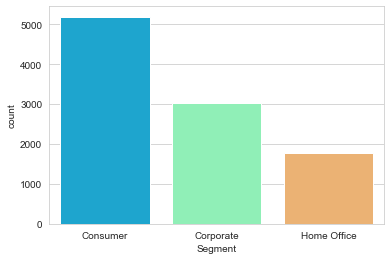

In [48]:
# Visualize the 'Segment' column from the dataset.
sns.set_style('whitegrid')
sns.countplot(x='Segment',data=store_df, palette='rainbow')

Obsercvation: Consumer count is highest and are maximum who buy from the store compared to others

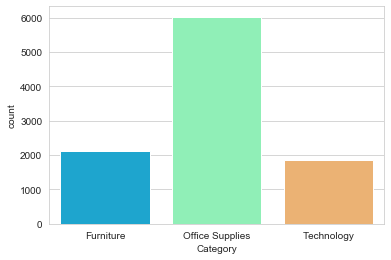

In [54]:
# Visualize the 'Category' column from the dataset.
sns.set_style('whitegrid')
sns.countplot(x='Category',data=store_df, palette='rainbow')

Observation: Office supplies items are being sold more compared to Furniture and Technology items

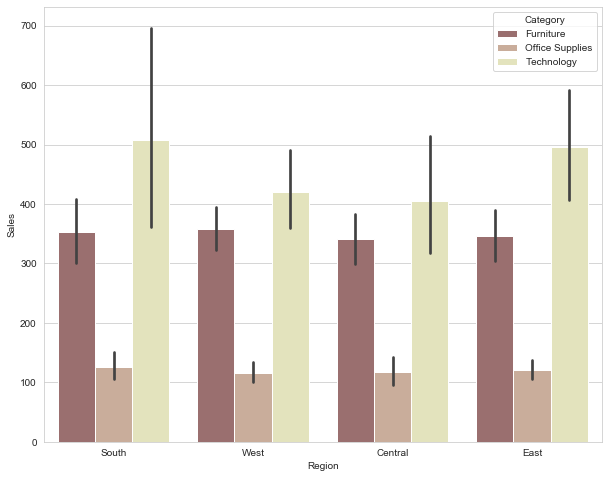

In [53]:
#Category wise sales in Each region
plt.figure(figsize=[10,8])
ax = sns.barplot(x="Region", y="Sales", hue="Category", data=store_df, palette="pink")


Observation: In each and every every region, sales for 'Office Supplies' are very poor. Furniture and Technology are well ahead.

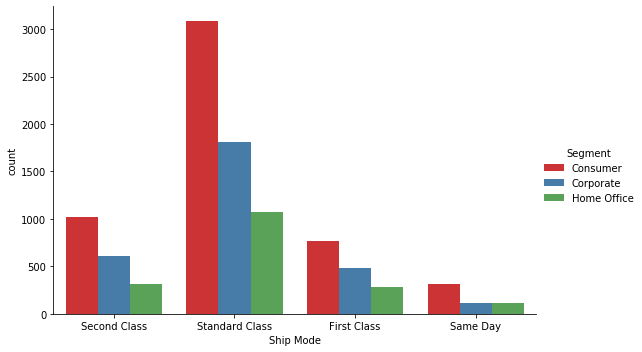

In [39]:
#Segment wise count of the ship modes
sns.catplot("Ship Mode", hue="Segment", data=store_df, kind="count", aspect=1.5, palette="Set1")

Observation: Consumer count is highest in each case and they generally prefer "Standard Class"

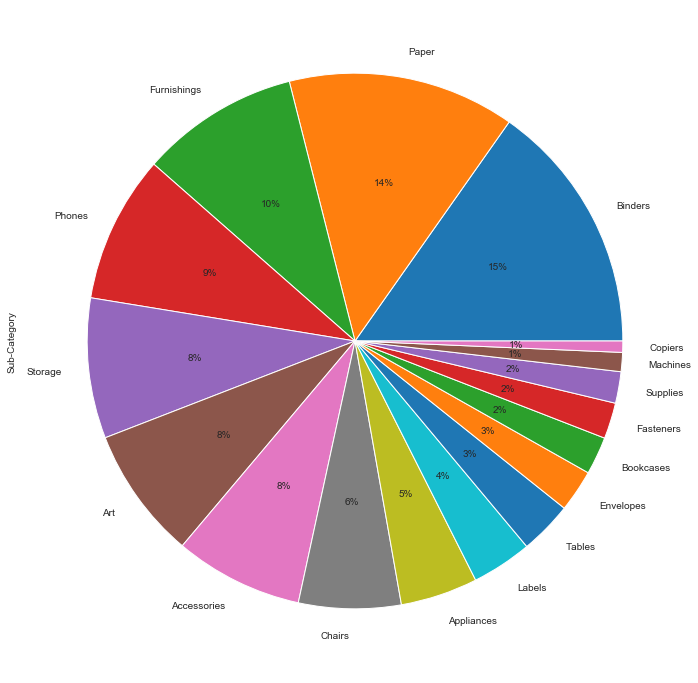

In [51]:
plt.figure(figsize=(12,22))
store_df['Sub-Category'].value_counts().plot.pie(autopct="%1.0f%%")

Observation: Binders holds the maximum percentage of sales among all other catrgories

## Conclusion

Scinerio shows large cities, like New York, Los Angeles are generating highest amount of Sales and Profit. And in case of Categories, Technology is always leading in terms of Sales and Profit,where as Office supplies are being sold more compared to Technology.some cities are there, where company is giving huge discounts but very less sales and profit is generating,And vice versa.To gain profit these issues need to be solved